In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from copy import deepcopy

#### Задание 1

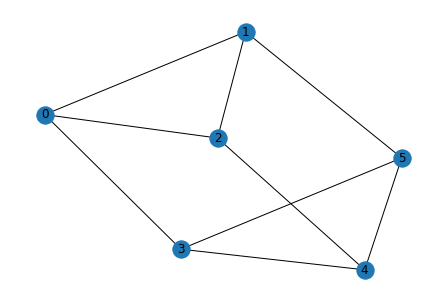

In [3]:
#Определяем затравку и сразу ее отрисовывем
zatravka = np.array([(0, 1), (0, 2), (0, 3), (1, 2), (1, 5), (2, 4), (3, 4), (3, 5),(4,5)])
# zatravka = np.array([(0, 1), (1, 2), (2, 0)])
G = nx.Graph()
G.add_edges_from(zatravka)
nx.draw(G, with_labels = True)

#### Задание 1.а)

In [4]:
#Функция создания предфрактального графа на основе затравки при условии сохранения смежности ребер
def fractal(zatravka, l=2):
    if l<1:
        return None
    G = nx.Graph()
    G.add_edges_from(zatravka)
    for _ in range(l-1):
        for node in list(G.nodes):
            maxx = max(G.nodes)
            curr = zatravka+maxx
            curr = np.where(curr == maxx, node, curr)
            G.add_edges_from(curr)
    return G

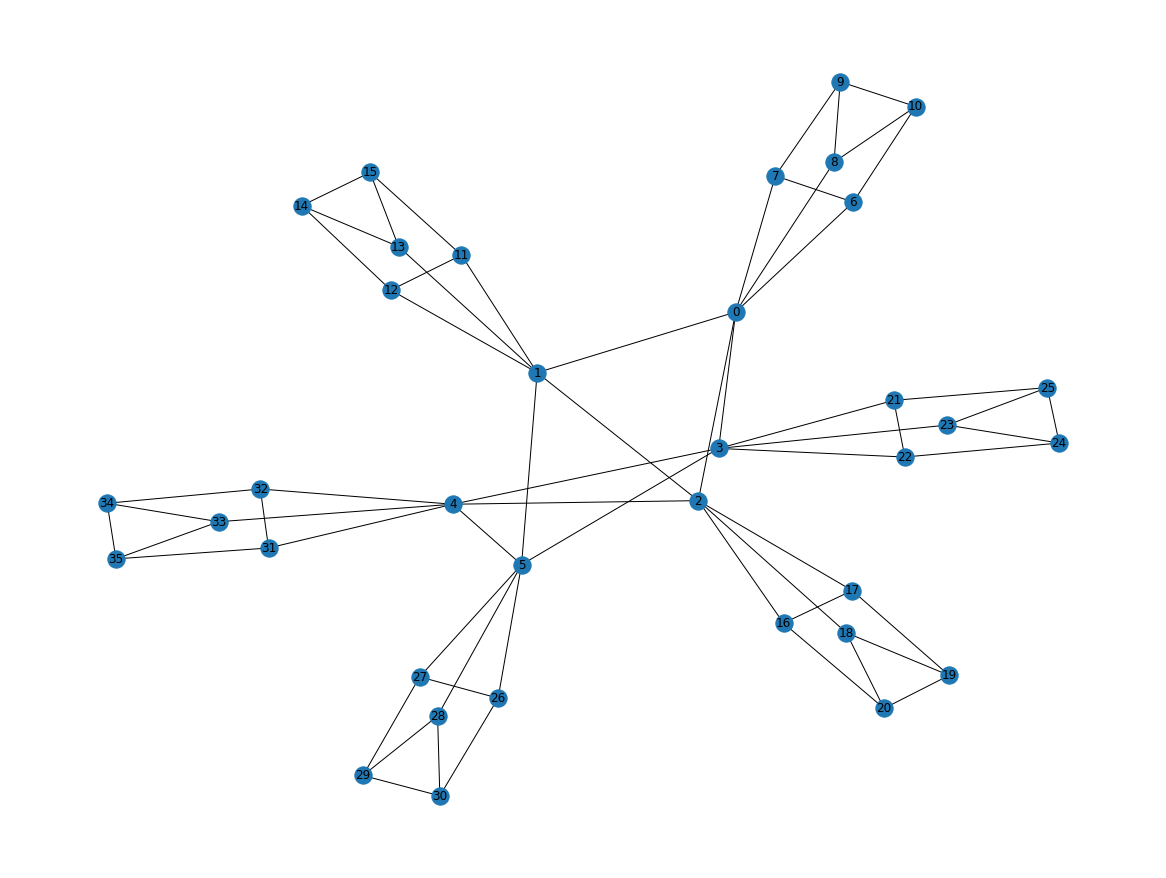

In [5]:
l = 2
G = fractal(zatravka, l)
plt.figure(figsize=(16,12))
nx.draw(G, with_labels = True)

In [6]:
print(f"Радиус для l={l} равен {nx.radius(G)}")

Радиус для l=2 равен 4


#### Задание 1.б)

In [7]:
def fractal2(zatravka, l=2):
    G = nx.Graph()
    for edge in zatravka:
        G.add_edge(*edge, rang=0)
    for li in range(l-1):
        for node in list(G.nodes):
            maxx = len(G.nodes) - 1
            curr_zatr = zatravka + maxx
            curr_zatr = np.where(curr_zatr == maxx, node, curr_zatr)
            curr_nodes = np.unique(curr_zatr) 
            random_node = random.choice(curr_nodes)

            curr_edges = sorted([edge for edge in G.edges(data=True) if node in edge],
                                key=lambda x:x[2]['rang'])
            prev_rang = curr_edges[0][2]['rang']

            for edge in curr_zatr:
                G.add_edge(*edge, rang=li+1)

            for edge in curr_edges:
                if edge[2]['rang'] != prev_rang:
                    prev_rang = edge[2]["rang"]
                    random_node = random.choice(curr_nodes)
                G.remove_edge(*edge[:2])
                if edge[0] == node:
                    start = edge[1]
                else:
                    start = edge[0]
                G.add_edge(start, random_node, rang=edge[2]['rang'])
    return G

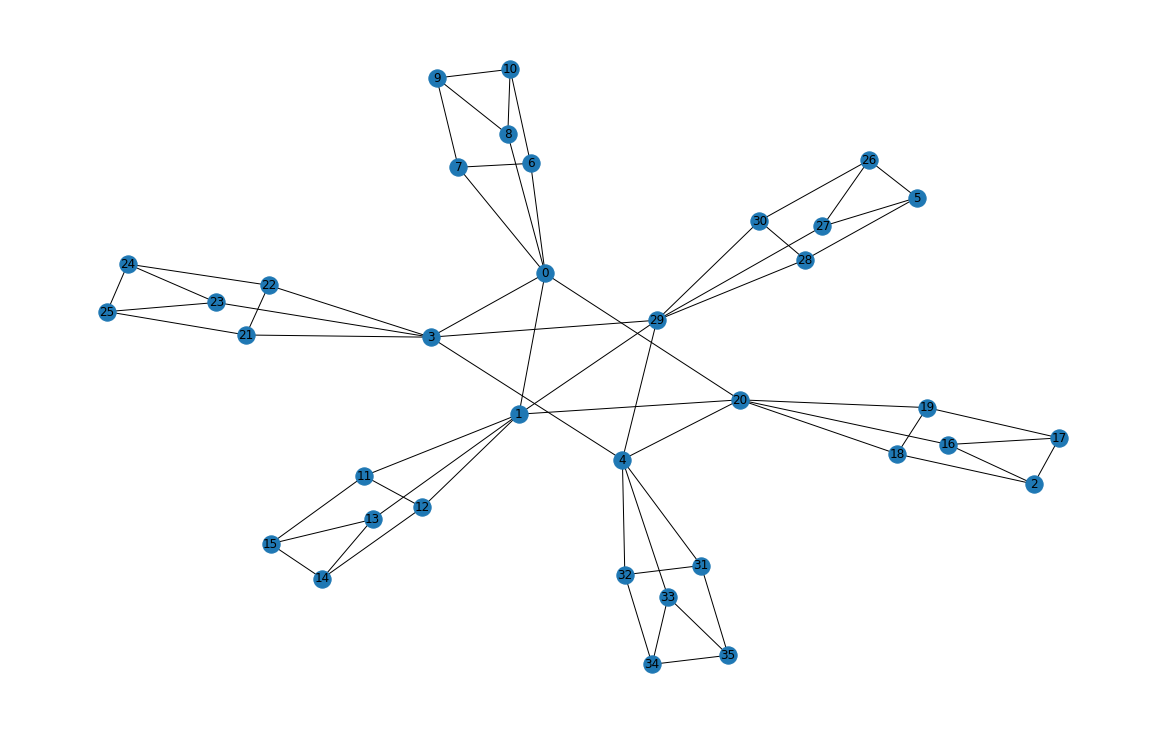

In [8]:
l = 2
G = fractal2(zatravka, l)
plt.figure(figsize=(16,10))
nx.draw(G, with_labels = True)

In [9]:
print(f"Диаметр предфрактального графа l={l} равен {nx.diameter(G)}")

Диаметр предфрактального графа l=2 равен 6


#### Задание 1.в)

In [10]:
def fractal3(zatravka, l=2):
    G = nx.Graph()
    G.add_edges_from(zatravka)
    for li in range(l-1):
        for node in list(G.nodes):
            maxx = len(G.nodes) - 1
            curr_zatr = zatravka + maxx
            curr_zatr = np.where(curr_zatr == maxx, node, curr_zatr)
            curr_nodes = np.unique(curr_zatr) 

            curr_edges = [edge for edge in G.edges if node in edge]

            G.add_edges_from(curr_zatr)

            for edge in curr_edges:
                random_node = random.choice(curr_nodes)
                G.remove_edge(*edge)
                if edge[0] == node:
                    start = edge[1]
                else:
                    start = edge[0]
                G.add_edge(start, random_node)
    return G

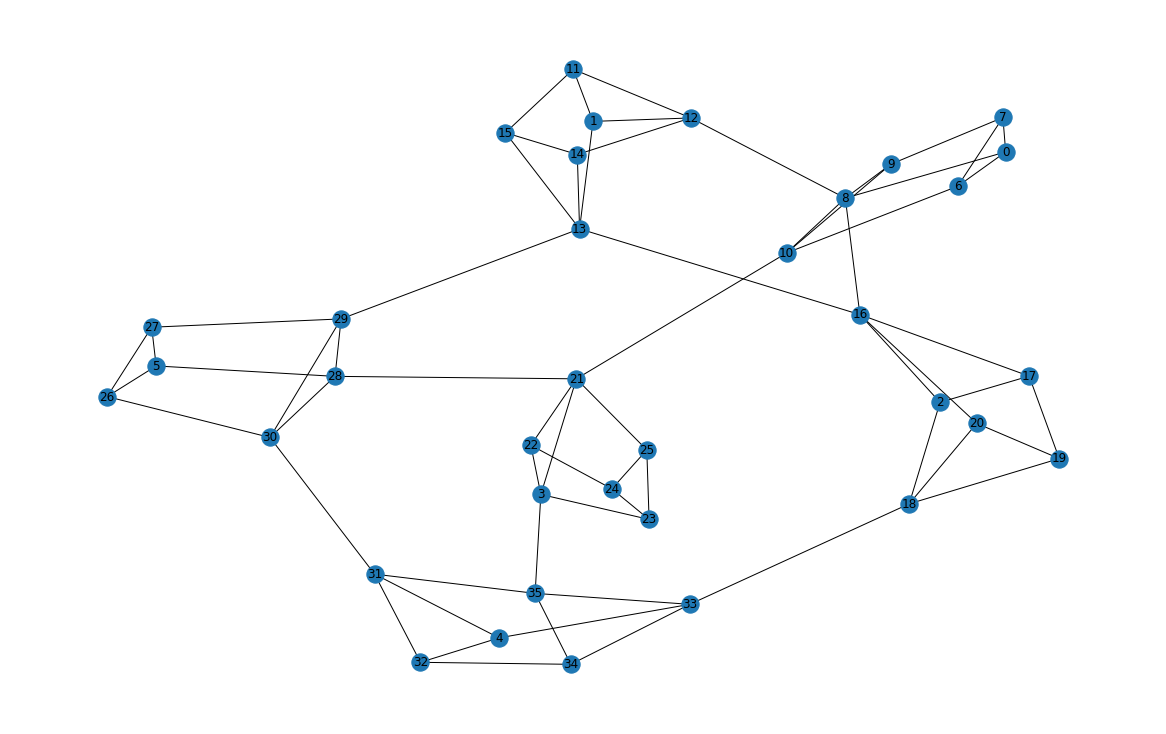

In [11]:
l=2
G = fractal3(zatravka, l)
plt.figure(figsize=(16,10))
nx.draw(G, with_labels = True)

In [12]:
print(f"Узловая связность предфрактального графа l={l} равен {nx.node_connectivity(G)}")
print(f"Реберная связность предфрактального графа l={l} равен {nx.edge_connectivity(G)}")
print(f"Количество связных компонент предфрактального графа l={l} равен {nx.number_connected_components(G)}")

Узловая связность предфрактального графа l=2 равен 2
Реберная связность предфрактального графа l=2 равен 3
Количество связных компонент предфрактального графа l=2 равен 1


#### Задание 2)

3
[(5, 3), (10, 3), (0, 4), (1, 4), (4, 4), (6, 4), (9, 4), (11, 4), (14, 4), (15, 4), (2, 5), (7, 5), (8, 5), (13, 5), (3, 6), (12, 6)]


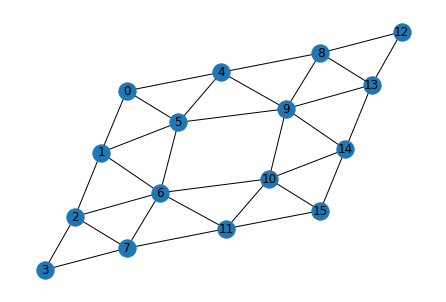

In [13]:
G = nx.Graph()
for i in range(0, 12, 4):
    for j in range(3):
        G.add_edge(j+i, j+i+1)
        G.add_edge(j+i, j+i+4)
        G.add_edge(j+i, j+i+5)
    G.add_edge(j+i+1, j+i+5)
for j in range(3):
    G.add_edge(i+4+j, i+5+j)
G.remove_edge(5, 10)
nx.draw(G, with_labels=True)
print(nx.radius(G))
print(sorted(nx.eccentricity(G).items(), key=lambda item: item[1]))

4
[(0, 4), (1, 4), (5, 4), (6, 4), (10, 4), (11, 4), (4, 5), (2, 5), (9, 5), (14, 5), (15, 5), (3, 6), (8, 6), (13, 6), (7, 7), (12, 7)]


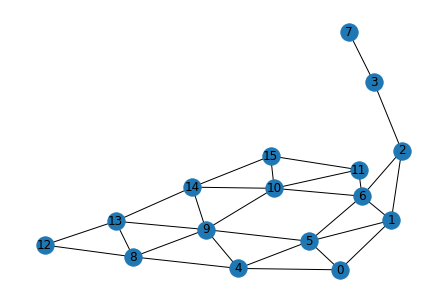

In [222]:
G.remove_edges_from([[2, 7], [6,7], [11, 7]])
nx.draw(G, with_labels=True)
print(nx.radius(G))
print(sorted(nx.eccentricity(G).items(), key=lambda item: item[1]))

5
[(0, 5), (4, 5), (5, 5), (1, 6), (6, 6), (8, 6), (9, 6), (2, 7), (10, 7), (12, 7), (13, 7), (14, 7), (3, 8), (15, 8), (7, 9), (11, 9)]


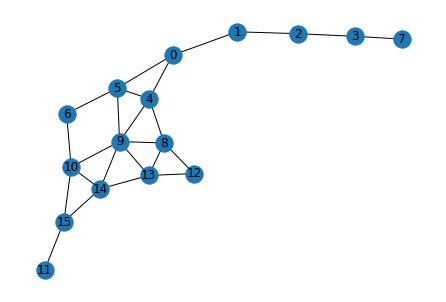

In [223]:
G.remove_edges_from([[5, 1], [1,6], [6,2], [6,11], [10,11]])
nx.draw(G, with_labels=True)
print(nx.radius(G))
print(sorted(nx.eccentricity(G).items(), key=lambda item: item[1]))

6
[(4, 6), (8, 6), (9, 6), (0, 7), (5, 7), (10, 7), (12, 7), (1, 8), (6, 8), (13, 8), (2, 9), (14, 9), (3, 10), (15, 10), (7, 11), (11, 11)]


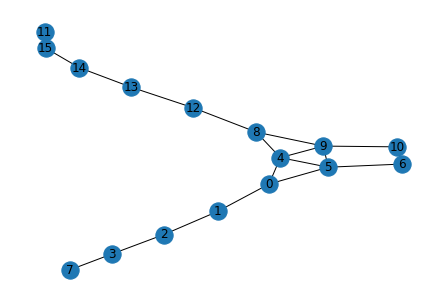

In [226]:
G.remove_edges_from([[10, 15], [10,14], [9,14], [9,13], [8,13]])
# G.add_edge(6, 15)
nx.draw(G, with_labels=True)
print(nx.radius(G))
print(sorted(nx.eccentricity(G).items(), key=lambda item: item[1]))

In [201]:
G.remove_edges_from([[0, 4], [5,9]])

#### Задание 3)

6
[(3, 6), (12, 6), (2, 5), (7, 5), (8, 5), (13, 5), (0, 4), (1, 4), (4, 4), (6, 4), (9, 4), (11, 4), (14, 4), (15, 4), (5, 3), (10, 3)]


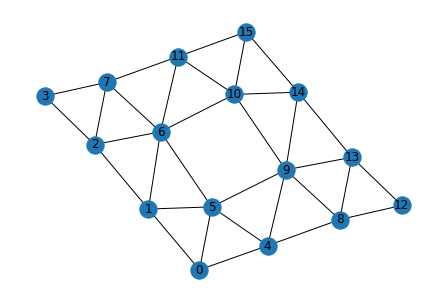

In [245]:
G = nx.Graph()
for i in range(0, 12, 4):
    for j in range(3):
        G.add_edge(j+i, j+i+1)
        G.add_edge(j+i, j+i+4)
        G.add_edge(j+i, j+i+5)
    G.add_edge(j+i+1, j+i+5)
for j in range(3):
    G.add_edge(i+4+j, i+5+j)
G.remove_edge(5, 10)
nx.draw(G, with_labels=True)
print(nx.diameter(G))
print(sorted(nx.eccentricity(G).items(), key=lambda item: item[1], reverse=True))

5
[(3, 5), (12, 5), (0, 4), (1, 4), (4, 4), (2, 4), (7, 4), (8, 4), (11, 4), (13, 4), (14, 4), (15, 4), (5, 3), (6, 3), (9, 3), (10, 3)]


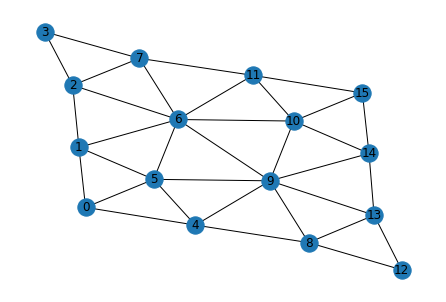

In [246]:
G.add_edge(6, 9)
nx.draw(G, with_labels=True)
print(nx.diameter(G))
print(sorted(nx.eccentricity(G).items(), key=lambda item: item[1], reverse=True))

4
[(0, 4), (1, 4), (2, 4), (3, 4), (7, 4), (11, 4), (12, 4), (15, 4), (4, 3), (5, 3), (6, 3), (8, 3), (10, 3), (13, 3), (14, 3), (9, 2)]


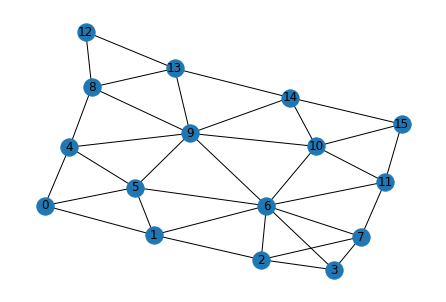

In [247]:
G.add_edge(3, 6)
nx.draw(G, with_labels=True)
print(nx.diameter(G))
print(sorted(nx.eccentricity(G).items(), key=lambda item: item[1], reverse=True))

3
[(0, 3), (1, 3), (4, 3), (2, 3), (3, 3), (7, 3), (8, 3), (11, 3), (12, 3), (13, 3), (14, 3), (15, 3), (5, 2), (6, 2), (9, 2), (10, 2)]


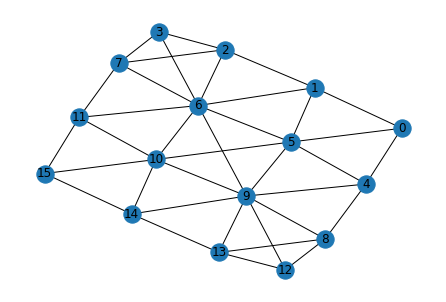

In [251]:
G.add_edges_from(((9, 12), (5,10)))
nx.draw(G, with_labels=True)
print(nx.diameter(G))
print(sorted(nx.eccentricity(G).items(), key=lambda item: item[1], reverse=True))

#### Задание 4

In [14]:
def draw(G, title=None):
    options = {
        'node_color': [params['clr'] for node, params in G.nodes(data=True)],
        'node_size': 3500,
        'width': 1,
        'arrowsize': 18,
        'labels': {node: f"n:{node}\nw:{param['w']}\nw_:{param['w_']}" for node, param in G.nodes(data=True)}
    }
    plt.figure(figsize=(12,10))
    if title:
        plt.title(title)
    nx.draw(G, **options)
    if G.nodes:
        ax = plt.gca()
        ax.collections[0].set_edgecolor("#000000")
    plt.show()
    
def epicenter(G):
    nodes = list(G.nodes)
    len_ = len(nodes)
    for i in range(len_):
        for j in range(i+1, len_):
            for k in range(len_):
                lenA = len(nx.shortest_path(G, source=nodes[i], target=nodes[k])) - 1
                lenB = len(nx.shortest_path(G, source=nodes[j], target=nodes[k])) - 1
                if lenA>2 and lenB>2:
                    break
            else:
                return (nodes[i], nodes[j])
    return None

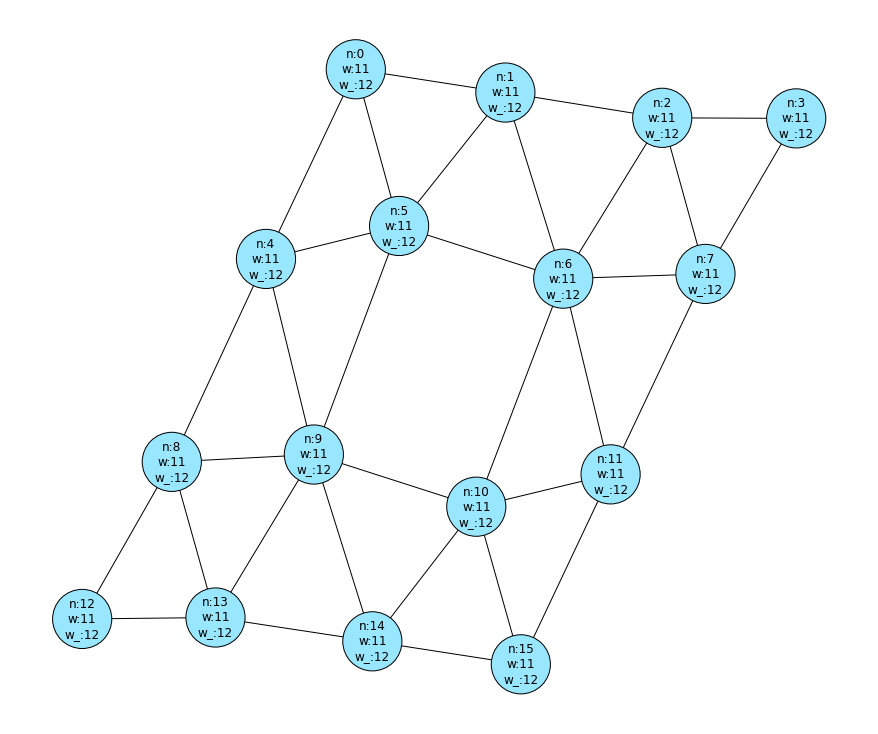

In [15]:
w=11 #weight
w_=12 #max_weight
G = nx.Graph()
for i in range(16):
    G.add_node(i, w=w, w_=w_, clr='#99e6ff')
for i in range(0, 12, 4):
    for j in range(3):
        G.add_edge(j+i, j+i+1)
        G.add_edge(j+i, j+i+4)
        G.add_edge(j+i, j+i+5)
    G.add_edge(j+i+1, j+i+5)
for j in range(3):
    G.add_edge(i+4+j, i+5+j)
G.remove_edge(5, 10)

draw(G)

если есть такие две вершины, из которых можно добраться за 2 или менее шага до любой точки (из одной или другой вершины), то такой граф можно разрушить за время T<=2.

In [16]:
centers = epicenter(G)
centers

(1, 9)

а такие вершины есть получается

In [480]:
def explode(G, centers):
    G = deepcopy(G)
    T = 0
    for center in centers:
        G.nodes[center]['clr'] = "#ff6738"
    draw(G, title=f"Начальное положение, выбраны эпицентры разрушения!")
    
    while True:
        for center in centers:
            if G.degree(center) == 0:
                G.remove_node(center)
                continue
            extra_weight = G.nodes[center]["w_"] / G.degree(center)
            for neighbour in nx.neighbors(G, center):
                neigh_node = G.nodes[neighbour]
                neigh_node["w"] += extra_weight
            G.remove_node(center)

        centers = []
        for node, params in G.nodes(data=True):
            if params["w"] > params["w_"]:
                params['clr'] = "#ff6738"
                centers.append(node)
        if not G.nodes:
            return T
        T += 1
        
        draw(G, title=f"T_cr={T}")

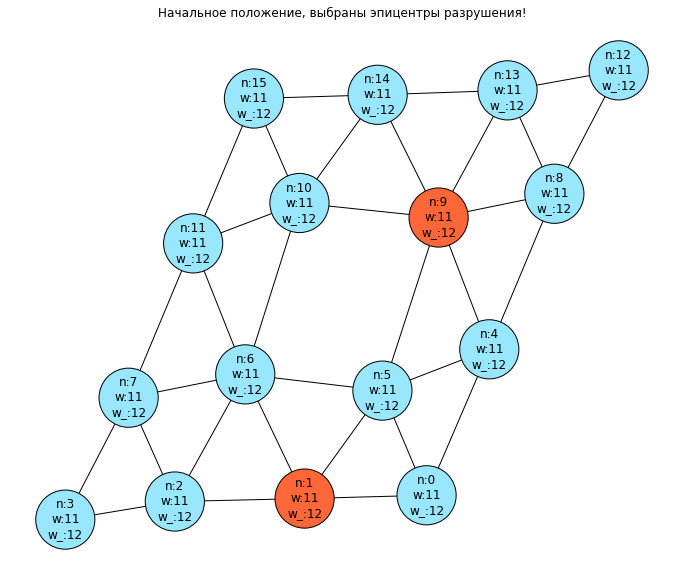

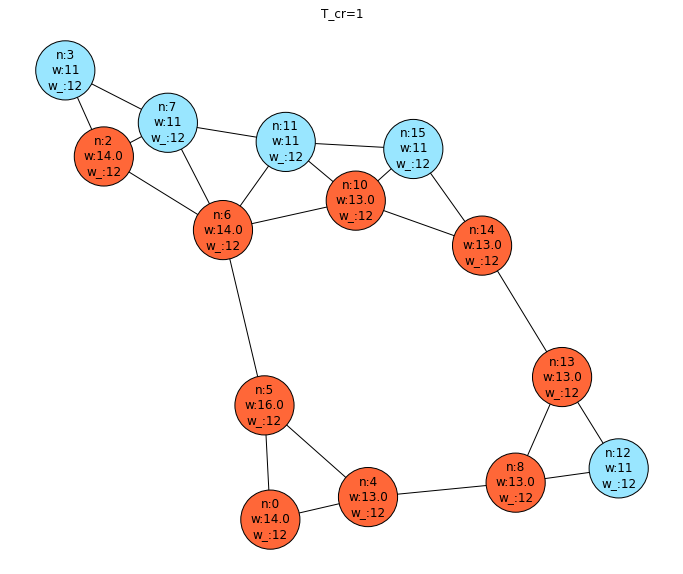

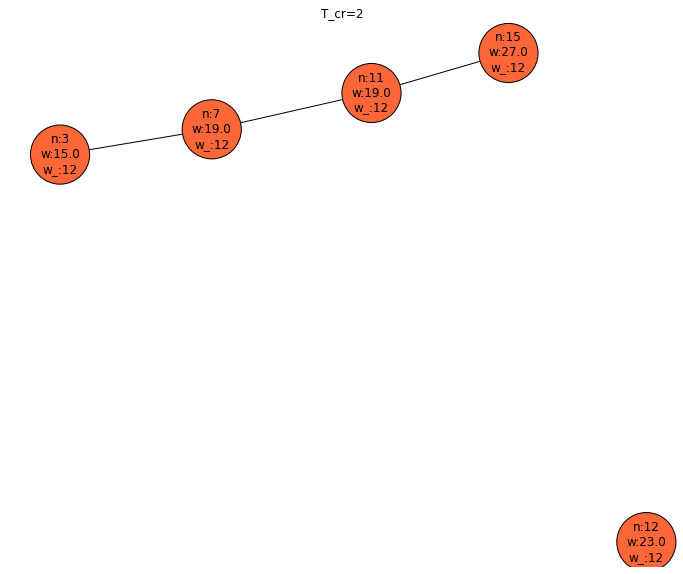

2

In [481]:
explode(G, centers)